# Applied Data Science with Python Project- Marketing Campaigns
## Submitted by- Vivek Chitale


#### Problem scenario:
Marketing mix stands as a widely utilized concept in the execution of marketing 
strategies. It encompasses various facets within a comprehensive marketing plan, 
with a central focus on the four Ps of marketing: product, price, place, and 
promotion.

#### Problem objective:
As a data scientist, you must conduct exploratory data analysis and hypothesis
testing to enhance your comprehension of the diverse factors influencing custome 
acquisition.

#### Data description:
The variables such as birth year, education, income, and others pertain to the first **'P'** or 'People' in the tabular data presented to the user. 
The expenditures on items like wine, fruits, and gold, are associated with **‘Product’**. 
Information relevant to sales channels, such as websites and stores, is connected to **‘Place’**, and 
the fields discussing promotions and the outcomes of various campaigns are linked to **‘Promotion’**.

In [22]:
#Importing libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#filtering the warnings while plotting
pd.options.mode.chained_assignment = None  # default='warn'

In [24]:
#Importing the marketing data csv file
df=pd.read_csv('marketing_data.csv')

In [26]:
#Show first five rows
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [28]:
#Show last five rows
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND
2239,4070,1969,PhD,Married,"$94,871.00",0,2,9/1/12,99,169,...,4,7,0,1,1,0,0,1,0,CA


#### Steps to perform:
1. After importing the data, examine variables such as Dt_Customer and Income to verify their accurate importation.

In [31]:
#df[' Income ']
# Clean up column names like ' Income ' that contain whitespace
df.columns = df.columns.str.strip()

#After importing the data, examine variables such as Dt_Customer and Income to verify their accurate importation.
df['Dt_Customer']
df['Income']

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name: Income, Length: 2240, dtype: object

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [35]:
# Transform 'Dt_Customer' column from object to date time
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])

# Transform income column to a numerical
df['Income'] = df['Income'].str.replace(',','').str.replace('$','').astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

#### Steps to perform:
2. There are missing income values for some customers. Conduct missing value imputation, considering that customers with similar education and marital 
status tend to have comparable yearly incomes, on average. It may be necessary to cleanse the data before proceeding. Specifically, scrutinize the 
categories of education and marital status for data cleaning.

In [38]:
# check the missing income values (null data)
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [40]:
# Conduct missing value imputation, considering that customers with similar education and marital status tend to have comparable yearly incomes, on avg.
# It may be necessary to cleanse the data before proceeding. Specifically, scrutinize the categories of education and marital status for data cleaning.
#Replacing Missing values based on Education and Marital Status

unique_Education = pd.unique(df.Education)
unique_MStatus=pd.unique(df.Marital_Status)

# set temp_data variable to avoid loss of real data
temp_data = df.copy()  
all_data_mean = np.round(np.mean(temp_data['Income']), 2)

for q in unique_Education:
    for m in unique_MStatus:
        filter = (temp_data.Education == q) & ( temp_data.Marital_Status == m)
        filtered_data = temp_data[filter]
        mean = np.round(np.mean(filtered_data['Income']), 2)
        if ~np.isnan(mean): 
            filtered_data['Income'] = filtered_data['Income'].fillna(mean)
        else: 
            filtered_data['Income'] = filtered_data['Income'].fillna(all_data_mean)
        temp_data[filter] = filtered_data
# copy cleansed data from temp_data variable
df = temp_data.copy() 

In [42]:
# check again to ensure null data is replace with comparable yearly incomes of customers with similar education and marital status.
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

#### Steps to perform:
3. Create variables to represent the total number of children, age, and total 
spending


In [45]:
import datetime
# Total number of dependents in the household
df['Children_Count'] = df['Kidhome'] + df['Teenhome']

# Age from birthyear
df['Age'] = datetime.datetime.now().year - df['Year_Birth']

# Total spending
df['TotalSpending'] = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)

#### Steps to perform:
3(a). Derive the total purchases from the number of transactions across the three channels.

In [55]:
# No of purchases made through all three channels like company's website, catelogue and store
#df['NumWebPurchases'].sum() = 9150
#df['NumCatalogPurchases'].sum() = 5963
#df['NumStorePurchases'].sum() = 12970

df['total_purchase'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
print("The total numbers of purchases done by each customer is as follows:")
df['total_purchase'].sum()

The total numbers of purchases done by each customer is as follows:


28083

#### Steps to perform:
4. Generate box plots and histograms to gain insights into the distributions and identify outliers. Implement outlier treatment as needed.

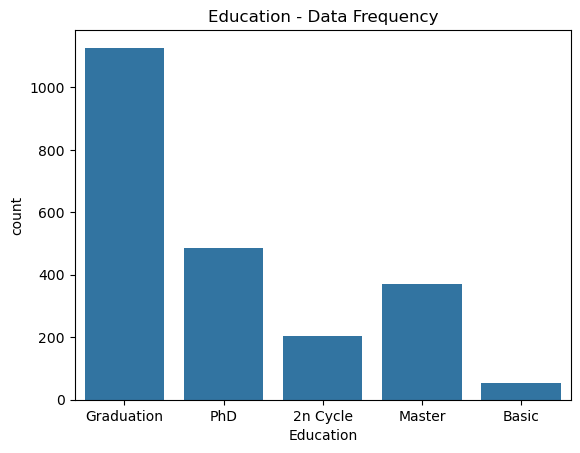

Number of samples According to Education 
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


In [58]:
# Number of samples according to Education
sns.countplot(x="Education", data=df)
plt.xticks(rotation = 0)
plt.title("Education - Data Frequency")
plt.show()
print(f"Number of samples According to Education \n{df['Education'].value_counts()}")

In [60]:
#In terms of education, both '2n cycle' and 'master' refer to the same level of education hence we will merge it into one column 'master'.
# Replace '2n cycle' with 'master'
df['Education'] = df['Education'].apply(lambda x: 'Master' if str(x) == '2n Cycle' else str(x))

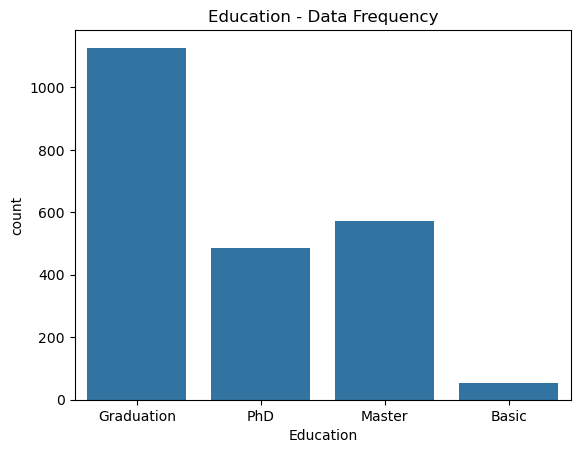

Number of samples According to Education 
Education
Graduation    1127
Master         573
PhD            486
Basic           54
Name: count, dtype: int64


In [62]:
# Number of samples according to Education (post merging of 2nd cycle into master)
sns.countplot(x="Education", data=df)
plt.xticks(rotation = 0)
plt.title("Education - Data Frequency")
plt.show()
print(f"Number of samples According to Education \n{df['Education'].value_counts()}")

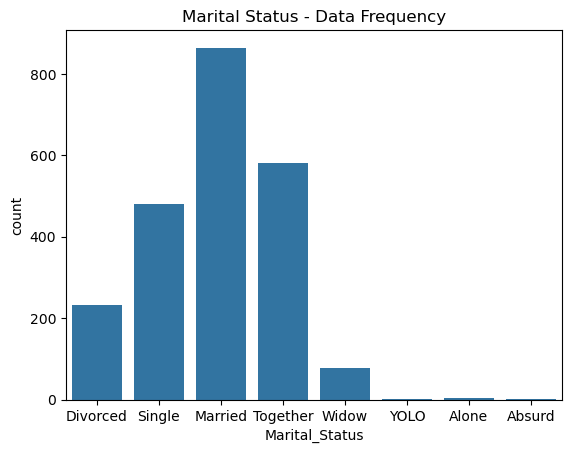

Number of samples According to Marital status 
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64


In [64]:
# Number of samples according to Marital status
sns.countplot(x="Marital_Status", data=df)
plt.xticks(rotation = 0)
plt.title("Marital Status - Data Frequency")
plt.show()
print(f"Number of samples According to Marital status \n{df['Marital_Status'].value_counts()}")

In [66]:
#In terms of Marital Status, YOLO, Alone and Absurd refer to the same status hence we will merge it into column 'Single'.
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['Alone', 'YOLO', 'Absurd'] else str(x))

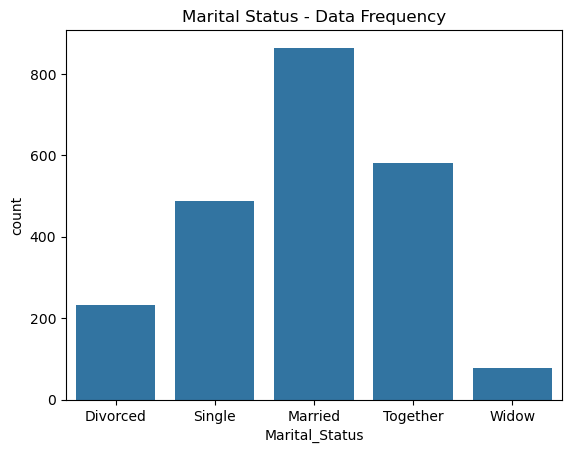

Number of samples According to Marital status 
Marital_Status
Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: count, dtype: int64


In [68]:
# Number of samples according to Marital status (post merging of YOLO, Alone and Absurd into Single)
sns.countplot(x="Marital_Status", data=df)
plt.xticks(rotation = 0)
plt.title("Marital Status - Data Frequency")
plt.show()
print(f"Number of samples According to Marital status \n{df['Marital_Status'].value_counts()}")

In [70]:
# Get total number of customers per country
df['Country'].value_counts()

Country
SP     1095
SA      337
CA      268
AUS     160
IND     148
GER     120
US      109
ME        3
Name: count, dtype: int64

In [72]:
# Print total columns
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Children_Count',
       'Age', 'TotalSpending', 'total_purchase'],
      dtype='object')

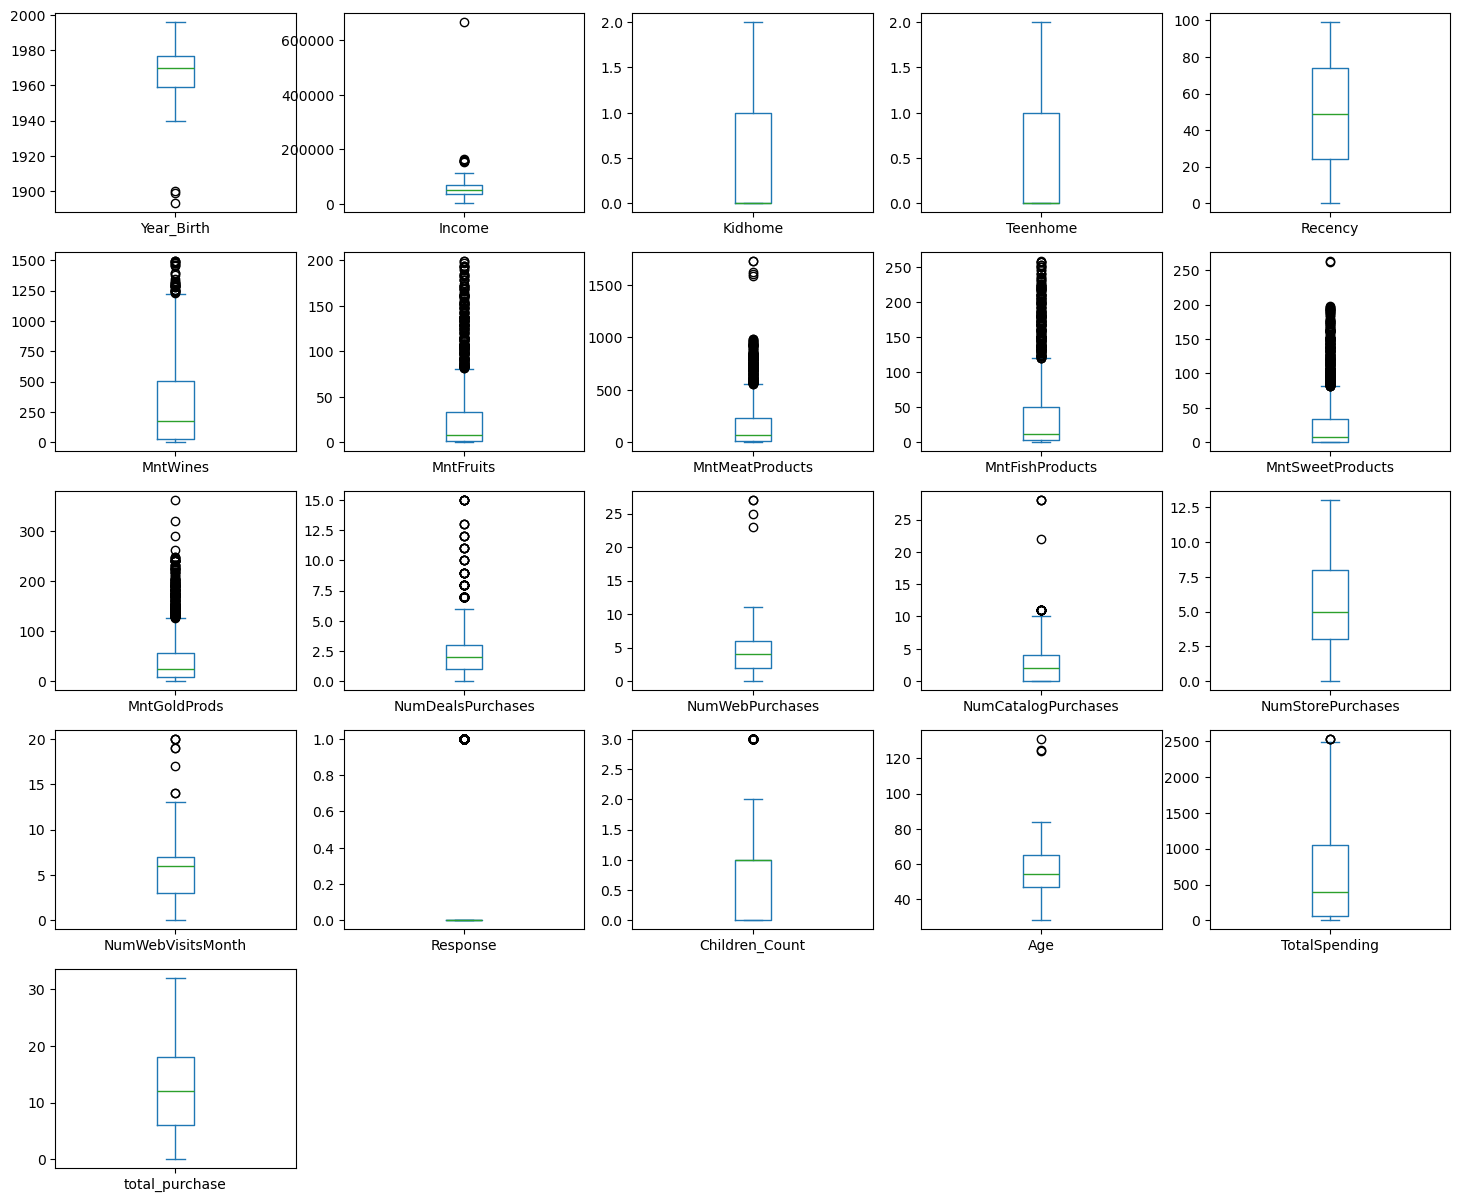

In [74]:
# Optimize data based on columns and set opt_data variable to avoid loss of real data
opt_data = df.copy() 
opt_data = opt_data.drop(['ID','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain'],axis=1)
numeric_cols = opt_data.select_dtypes(include=['number']).columns
opt_data[numeric_cols].plot(subplots=True, layout=(5,5), kind='box', figsize=(18,15))
plt.show()

<Axes: >

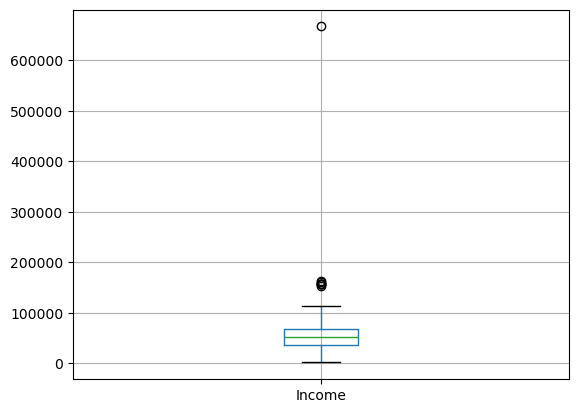

In [76]:
df.boxplot('Income')

<Axes: >

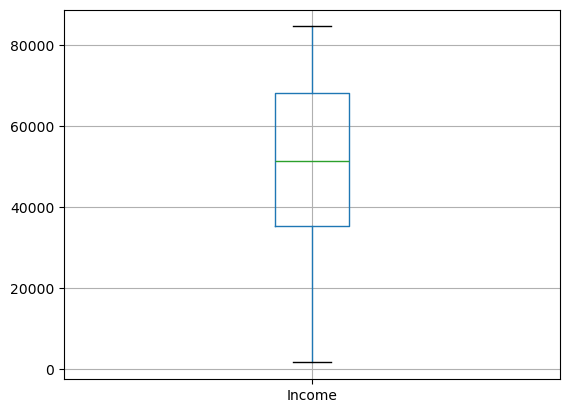

In [78]:
#Removing outliers from income
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5*IQR
UB = Q1 + 1.5*IQR
df['Income'].mask(df['Income'] > UB, UB, inplace=True)
df.boxplot('Income')

# df = df.drop(df[df['Year_Birth'] <= 1900].index)
# df = df.drop(df[df['Income'] > 600000].index)

<Axes: >

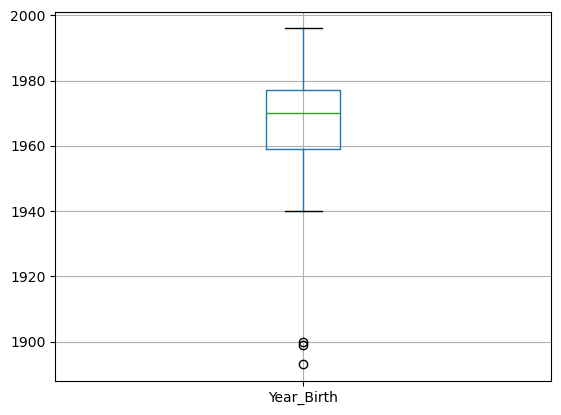

In [80]:
df.boxplot('Year_Birth')

<Axes: >

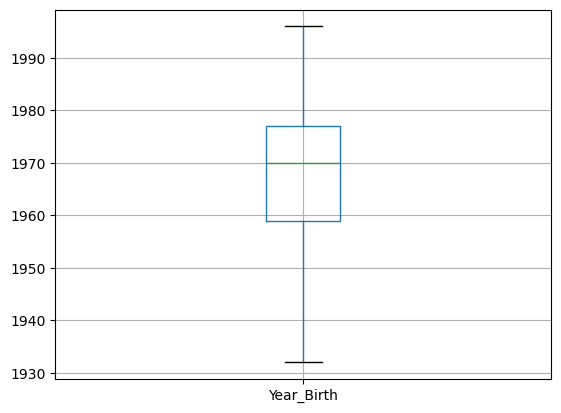

In [82]:
#Removing outliers from year of birth
Q1 = df['Year_Birth'].quantile(0.25)
Q3 = df['Year_Birth'].quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5*IQR
UB = Q1 + 1.5*IQR
df['Year_Birth'].mask(df['Year_Birth'] < LB, LB, inplace=True)
df.boxplot('Year_Birth')

<Axes: xlabel='Income', ylabel='Density'>

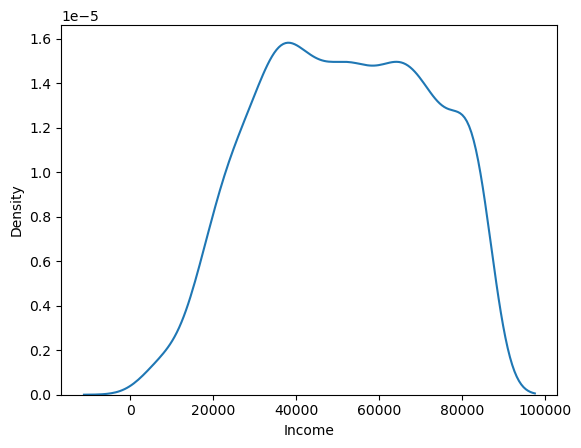

In [84]:
# Distribution of Income
sns.kdeplot(data=df, x="Income")

#### Steps to perform:
5. Apply ordinal and one-hot encoding based on the various types of categorical variables.

In [87]:
# Optimize data for encoding and set enc_data variable to avoid loss of real data
enc_data = df.copy()
enc_data = enc_data.drop(['ID', 'Year_Birth','Kidhome','Teenhome','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain'],axis=1)

In [89]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Children_Count',
       'Age', 'TotalSpending', 'total_purchase'],
      dtype='object')

In [91]:
enc_data.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Response', 'Country', 'Children_Count', 'Age',
       'TotalSpending', 'total_purchase'],
      dtype='object')

In [93]:
df.Education.unique().tolist()

['Graduation', 'PhD', 'Master', 'Basic']

#### Steps to perform:
6. Generate a heatmap to illustrate the correlation between different pairs of variables.

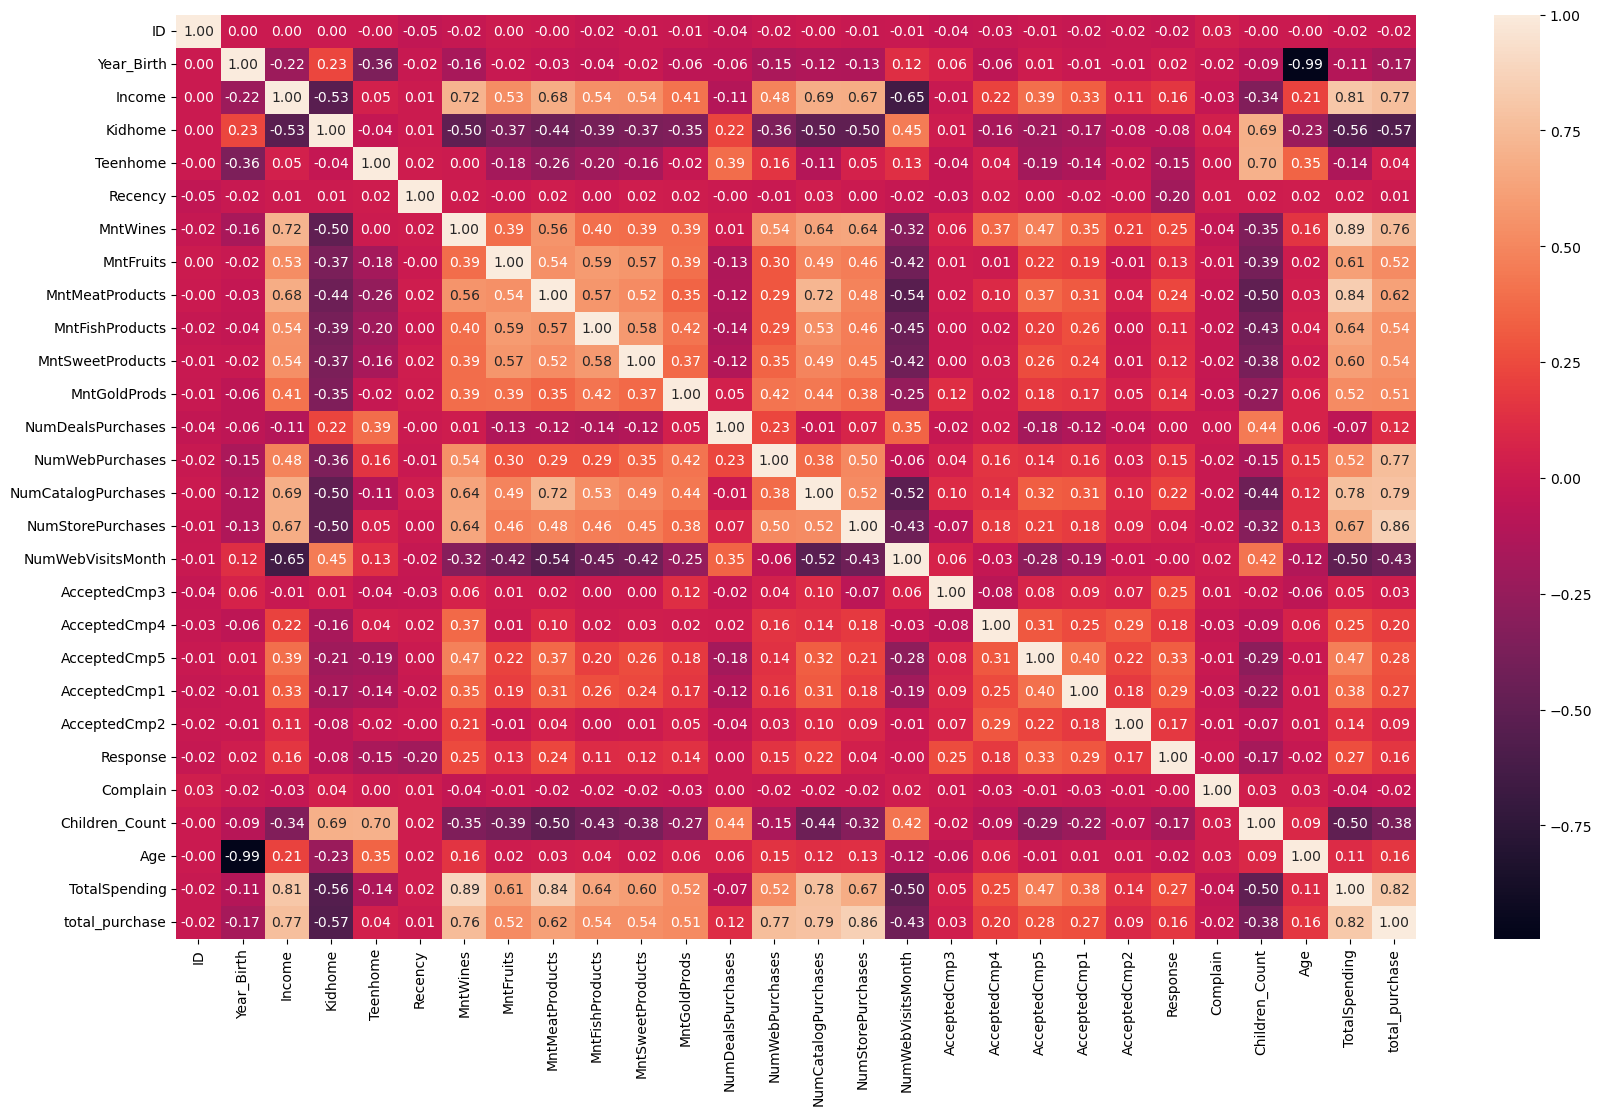

In [96]:
# lets check the correlation between variables through heatmap
corr = df.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True,fmt='.2f')
plt.show()

#### Steps to perform:
7. Test the following hypotheses:

a. Older individuals may not possess the same level of technological 
proficiency and may, therefore, lean toward traditional in-store shopping 
preferences.

In [99]:
df_age=df[['Age','NumWebPurchases','NumStorePurchases']]


df_age.loc[(df_age['Age'] <= 25) , 'Age_Group'] = 'Young'
df_age.loc[(df_age['Age']  > 50) , 'Age_Group'] = 'Elderly'
df_age.loc[(df_age['Age']  > 25) & (df_age['Age'] <= 50) , 'Age_Group'] = 'Middle Age'


df_age.head()

,Age,NumWebPurchases,NumStorePurchases,Age_Group
0,54,4,6,Elderly
1,63,7,7,Elderly
2,66,3,5,Elderly
3,57,1,2,Elderly
4,35,3,2,Middle Age


In [101]:
df_age_plot=df_age[["Age_Group", 'NumWebPurchases','NumStorePurchases']].groupby(["Age_Group"]).sum() # Age_Group as an index for plotting .reset_index() 
df_age_plot.head()

,NumWebPurchases,NumStorePurchases
Age_Group,,
Elderly,6055,8411
Middle Age,3095,4559


<Axes: xlabel='Age_Group'>

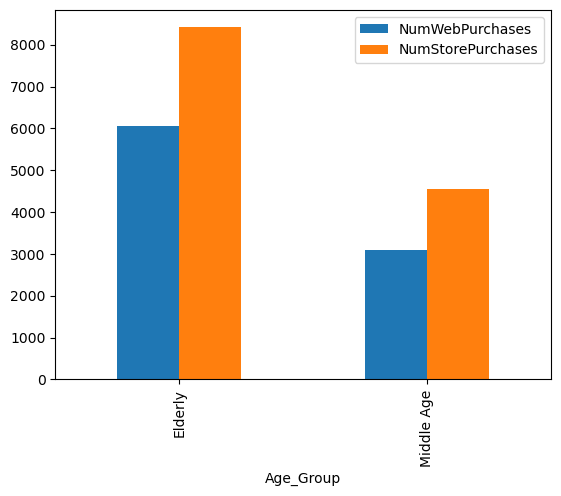

In [103]:
df_age_plot.plot.bar()

##### Older people have more instore purchases than online purchases

#### Steps to perform:7. 
Test the following hypotheses

b.  Customers with children likely experience time constraints, making online 
shopping a more convenient option:

In [107]:
df_kids=df[['Children_Count','NumWebPurchases','NumStorePurchases']]
df_kids_plot= df_kids.groupby(["Children_Count"]).sum() #.reset_index() 
df_kids_plot.head()

,NumWebPurchases,NumStorePurchases
Children_Count,,
0,2803,4635
1,4834,6310
2,1361,1815
3,152,210


<Axes: xlabel='Children_Count'>

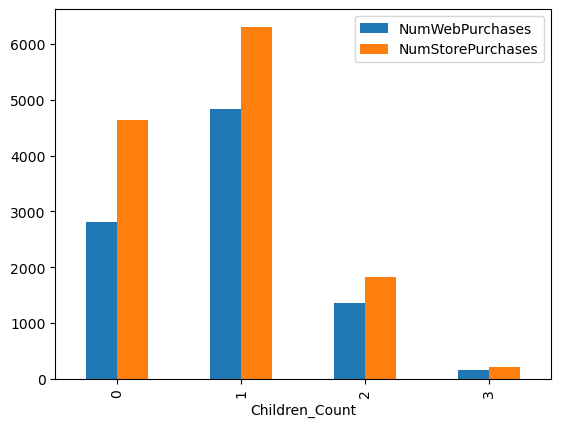

In [109]:
df_kids_plot.plot.bar()

##### Parents with 2 or more children seem spending very less in shopping.
These categories of parents prefer shopping instore however increasing trend is noticed on online purchases among these parents. 

#### Steps to perform:
7. Test the following hypotheses:

c. Sales at physical stores may face the risk of cannibalization by alternative distribution channels

([<matplotlib.patches.Wedge at 0x1fc48331e50>,
 [Text(0.9698058573993448, 0.5191113550616302, 'Deals'),
  Text(-0.29933747437362795, 1.0584881087832863, 'Online'),
  Text(-1.090577484984908, -0.14366888752960116, 'Catalog'),
  Text(0.3739290163314566, -1.0344936397800566, 'Instore')])

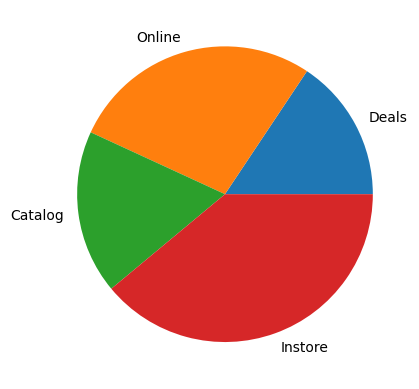

In [113]:
labels = ['Deals','Online','Catalog','Instore']
sizes = [df.NumDealsPurchases.sum(),
         df.NumWebPurchases.sum(),
         df.NumCatalogPurchases.sum(),
         df.NumStorePurchases.sum()]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

##### The sales are highest at the Store than any other distribution channel. However all the distribution channels combinely have more sales than at the Store

#### Steps to perform:
7. Test the following hypotheses:

d. Does the United States significantly outperform the rest of the world in total purchase volumes?

In [117]:
totalpurchases = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Country']]
totalpurchases.head(1)

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Country
0,1,4,4,6,SP


In [119]:
# Calculate the total number of purchases made through different channels
totalpurchases['TotalPurchases'] = totalpurchases['NumDealsPurchases'] + totalpurchases['NumWebPurchases'] + totalpurchases['NumCatalogPurchases'] + totalpurchases['NumStorePurchases']
totalpurchases.head(1)

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Country,TotalPurchases
0,1,4,4,6,SP,15


In [121]:
average_purchases_per_country = totalpurchases.groupby('Country').agg(Total_Purchases = ('TotalPurchases', 'sum'))
average_purchases_per_country.head(1)

,Total_Purchases
Country,
AUS,2314


In [123]:
average_purchases_per_country['Total_Customers'] = totalpurchases['Country'].value_counts()
average_purchases_per_country.head(1)

,Total_Purchases,Total_Customers
Country,,
AUS,2314,160


In [125]:
average_purchases_per_country['Purchases_Per_Customer'] = np.floor(average_purchases_per_country['Total_Purchases'] / average_purchases_per_country['Total_Customers'])
average_purchases_per_country.head(1)

,Total_Purchases,Total_Customers,Purchases_Per_Customer
Country,,,
AUS,2314,160,14.0


In [127]:
average_purchases_per_country.assign(country = average_purchases_per_country.index.get_level_values('Country'))
average_purchases_per_country.head(1)

,Total_Purchases,Total_Customers,Purchases_Per_Customer
Country,,,
AUS,2314,160,14.0


In [129]:
average_purchases_per_country.reset_index(inplace = True)
average_purchases_per_country.head(1)

,Country,Total_Purchases,Total_Customers,Purchases_Per_Customer
0,AUS,2314,160,14.0


In [131]:
average_purchases_per_country = average_purchases_per_country.sort_values(by = 'Total_Purchases', ascending = False)
average_purchases_per_country.head(1)

,Country,Total_Purchases,Total_Customers,Purchases_Per_Customer
6,SP,16052,1095,14.0


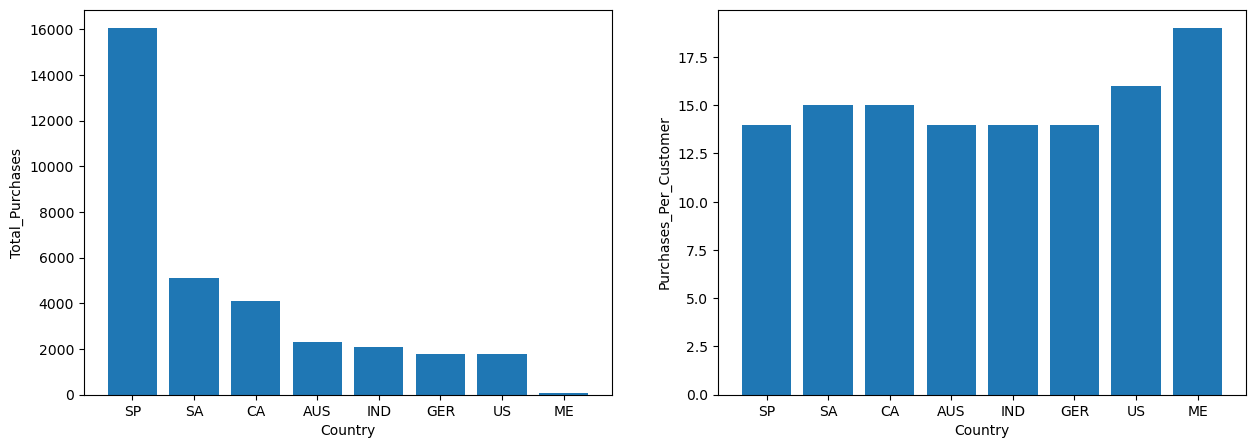

In [133]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.bar(x = average_purchases_per_country['Country'], 
        height = average_purchases_per_country['Total_Purchases'])
ax1.set_xlabel('Country', fontsize=10)
ax1.set_ylabel('Total_Purchases', fontsize='medium') 

ax2.bar(x = average_purchases_per_country['Country'],
       height = average_purchases_per_country['Purchases_Per_Customer'])
ax2.set_xlabel('Country', fontsize=10)
ax2.set_ylabel('Purchases_Per_Customer', fontsize='medium') 

plt.show()

##### In terms of total number of purchases, USA doesn't seem to be in a good position. In fact it is the lowest (excluding ME due to only 3 records). However if we look at the purchases made per person in a country, then USA tops the chart.

#### Steps to perform:
8. Use appropriate visualization to help analyze the following:

a. Identify the top-performing products and those with the lowest revenue.

Revenue generated by different products can be visualized in the following chart:


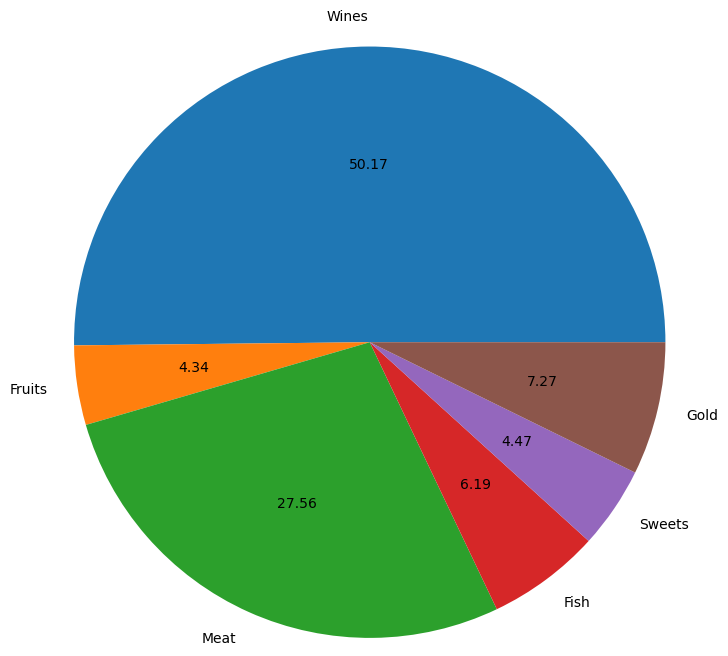

In [137]:
WinesR = df['MntWines'].sum()
FruitsR = df['MntFruits'].sum()
MeatR = df['MntMeatProducts'].sum()
FishR = df['MntFishProducts'].sum()
SweetsR = df['MntSweetProducts'].sum()
GoldR = df['MntGoldProds'].sum()

data=[WinesR,FruitsR,MeatR,FishR,SweetsR,GoldR]
labels= ['Wines','Fruits','Meat','Fish','Sweets','Gold']
print("Revenue generated by different products can be visualized in the following chart:")
ax = plt.pie(data,autopct='%.2f',radius=2,labels=labels)

##### Clearly Wines are performing the best in generating revenue with a 50% share aAnd Fruits are performing the least with 4.34 percent of share.

#### Steps to perform:
Use appropriate visualization to help analyze the following:

b. Examine if there is a correlation between customers' age and the 
acceptance rate of the last campaign.

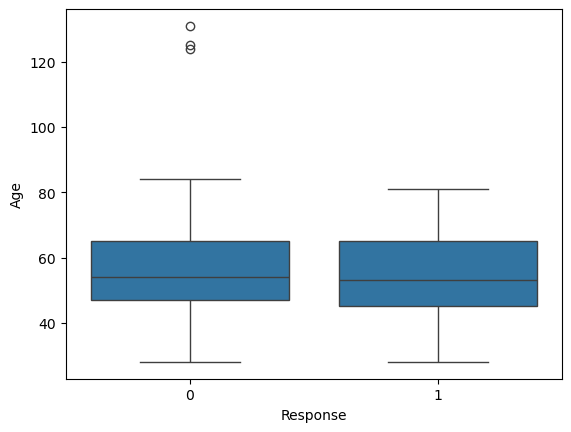

In [141]:
ax = sns.boxplot(data=df,y=df['Age'],x=df['Response'])

##### There does not seem to be a pattern between the Age of customers and their rate of acceptance. Both boxplots have similar medians and similar spread with almost same quantile ranges. One interesting observation is the presence of customers as old as 130, which cannot be statistically negated.

#### Steps to perform:
8. Use appropriate visualization to help analyze the following:

c. Determine the country with the highest number of customers who accepted the last campaign.

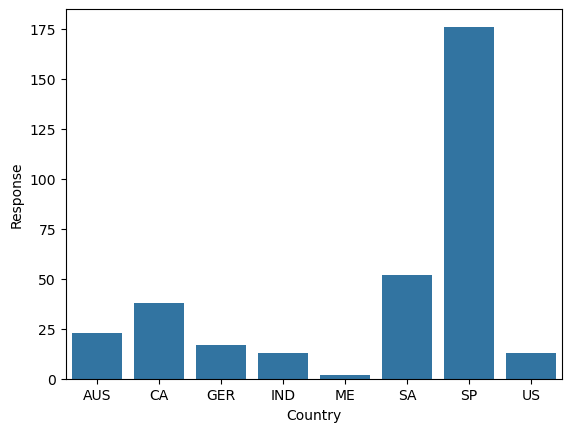

In [145]:
data = df.loc[df['Response']==1,['Country','Response']]
data

ByCountry = data.groupby('Country').sum().reset_index()
ax = sns.barplot(data=ByCountry,x='Country',y='Response')

##### Clearly the country SP has the most number of customers who accepted the last campaign.

#### Steps to perform:
8. Use appropriate visualization to help analyze the following:

d. Investigate if there is a discernible pattern in the number of children at 
home and the total expenditure

[Text(0.5, 0, 'Number of Dependents')]

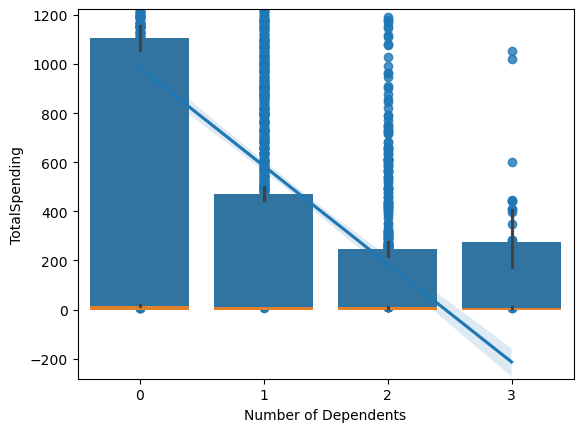

In [152]:
Dependents = df['Kidhome']+df['Teenhome'] #numerical data
ax = sns.regplot(x=Dependents,y=df['TotalSpending'])

ax = sns.barplot(x=Dependents,y=df['TotalSpending'])
ax.set(xlabel='Number of Dependents')

ax=sns.barplot(x=Dependents,y=df['total_purchase'])
ax.set(xlabel='Number of Dependents')

##### Customers with no dependents at home spend most.

In [155]:
dummy=df.loc[:,['Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Age','TotalSpending','total_purchase']]

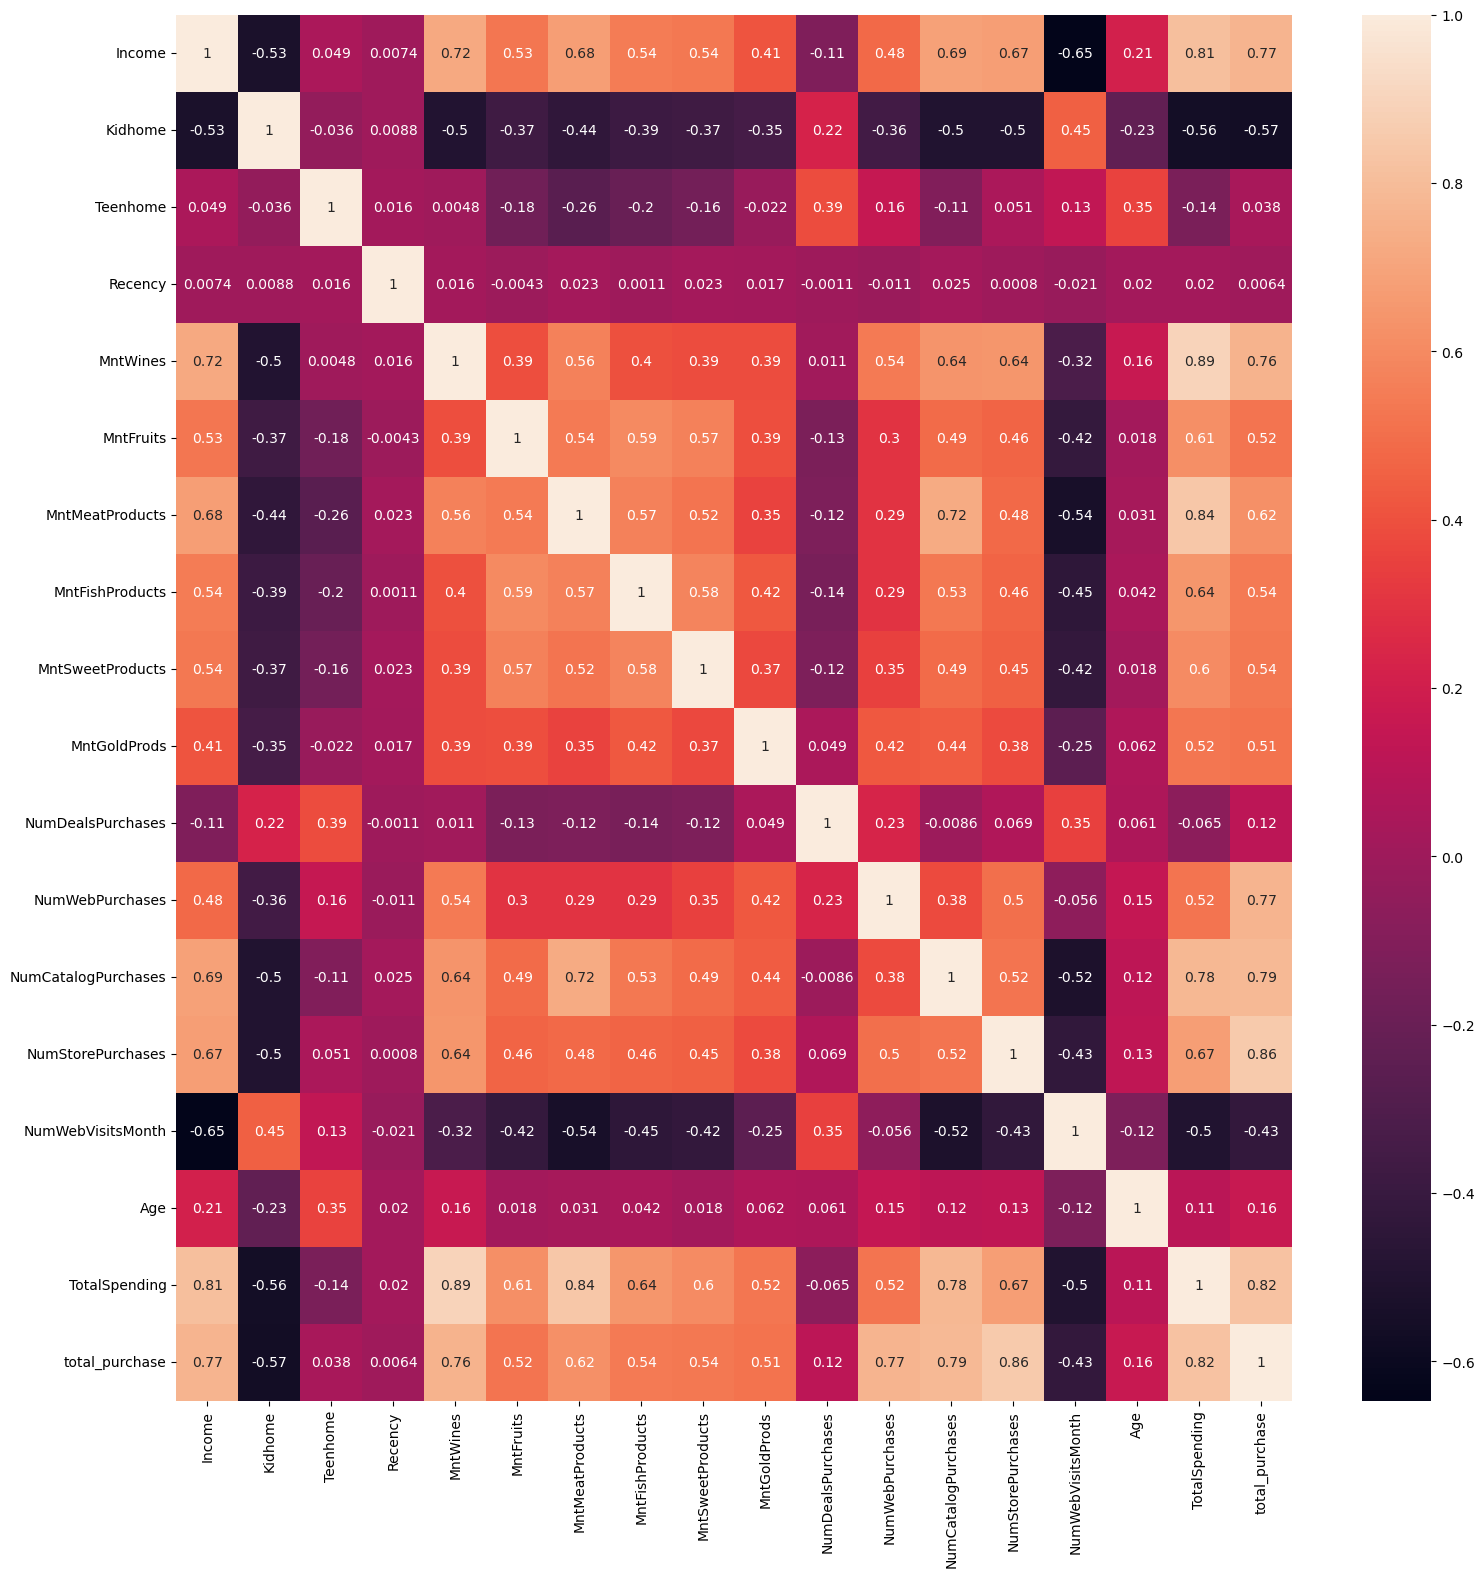

In [157]:
ax,figure=plt.subplots(figsize=(18,18))
ax=sns.heatmap(dummy.corr(),annot=True,)

In [159]:
dummy.corr()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,TotalSpending,total_purchase
Income,1.000000,-0.527505,0.048716,0.007405,0.719022,0.530336,0.676956,0.544254,0.536566,0.409766,-0.113787,0.481006,0.686493,0.673771,-0.646724,0.213430,0.812241,0.767952
Kidhome,-0.527505,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,0.221798,-0.361647,-0.502237,-0.499683,0.447846,-0.230176,-0.556669,-0.568637
Teenhome,0.048716,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725,0.387741,0.155500,-0.110769,0.050695,0.134884,0.352111,-0.138384,0.037902
Recency,0.007405,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,-0.001098,-0.010726,0.025110,0.000799,-0.021445,0.019871,0.020433,0.006410
MntWines,0.719022,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.010940,0.542265,0.635226,0.642100,-0.320653,0.157773,0.891839,0.756490
MntFruits,0.530336,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,-0.132114,0.296735,0.487917,0.461758,-0.418383,0.017917,0.614229,0.520686
MntMeatProducts,0.676956,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,-0.122415,0.293761,0.723827,0.479659,-0.539470,0.030872,0.842965,0.623315
MntFishProducts,0.544254,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,-0.139361,0.293681,0.534478,0.459855,-0.446003,0.041625,0.642818,0.537538
MntSweetProducts,0.536566,-0.370673,-0.162475,0.022670,0.386581,0.567164,0.523846,0.579870,1.000000,0.369724,-0.120100,0.348544,0.490924,0.448756,-0.423294,0.018133,0.603016,0.536019
MntGoldProds,0.409766,-0.349595,-0.021725,0.016693,0.387516,0.392995,0.350609,0.422875,0.369724,1.000000,0.049085,0.421836,0.437697,0.381678,-0.250719,0.061818,0.524262,0.512427


#### Steps to perform:
8. Use appropriate visualization to help analyze the following:

e. Analyze the educational background of customers who lodged complaints 
in the last two years

[Text(0.5, 0, 'Education Level'), Text(0, 0.5, 'Number of Complaints')]

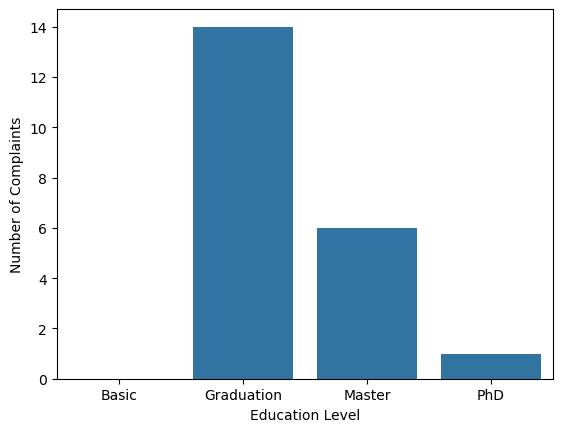

In [162]:
ComplaintsEd = df.loc[:,['Education','Complain']]
ComplaintsEd = ComplaintsEd.groupby('Education').sum().reset_index()
ax = sns.barplot(data=ComplaintsEd,x='Education',y='Complain')
ax.set(xlabel='Education Level',ylabel='Number of Complaints')

##### As is clear from the barplot, those with Graduation background filed the most number of complaints.